# Experimenting with least squares and its variants

In [47]:
%matplotlib inline

from sklearn import datasets
from scipy.optimize import fmin_bfgs
from sklearn.linear_model import LinearRegression
import numpy as np
from numpy.linalg import norm
from numpy.linalg import inv
from matplotlib import pyplot as plt

## Data preparation

In [2]:
boston = datasets.load_boston()
data = np.array(boston.data)

The boston dataset is one of the standard regression problems used to experiment with learning algorithms. Below you can find the dataset description

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

First step to apply the formulae we learnt during the lectures is to rewrite the dataset in homogeneous coordinates (i.e., we append a column of 1 to the matrix containing the examples):

In [4]:
t = np.ones(len(data)).reshape(len(data),1)
data = np.append(data, t, 1)
target = np.array(boston.target)

We now divide the data into a training set $X$ and a test set $X_\textrm{test}$.

In [5]:
X,y = data[0:400,:], target[0:400]
X_test, y_test = data[400:,:], target[400:]

# Exercise

1. Calculate the least square solution (to the regression problem outlined above) and evaluate its performances on the training set and on the test set.
1. Calculate the ridge regression solution (set lambda to 0.01) and evaluate its performances on the training set and on test set.
1. Calculate the lasso regression solution and evaluate its performances on the training set and on the test set.

## Notes

- Here it follows a list of functions you may want to use (the required packages are already imported at the beginning of this notebook) along with a very brief explanation of their purpose (`help(nomefun)` will provide you more information about function `nomefun`):
    - `transpose`: matrix transposition (e.g., `transpose(X)`)
    - `dot`: matrix multiplication (e.g., `X.dot(X2)`) 
    - `inv`: matrix inversion (e.g., `inv(X)`)
- to solve the lasso problem you will need to perform a numerical minimization of the associated loss function (as you know, a closed form solution does not exist). There are many numerical optimization algorithms available in the scipy package. My suggestion is to use `fmin_bfgs`. Here it follows an example of how to use it:
    ```python
        def f(w):
            return w[0]**2 + w[1]**2 + w[0] + w[1]
        
        w = fmin_bfgs(f, [0,0])
    ```
    note that the function may (and should) reference your data variables (i.e., $X$ and $y$).
- to evaluate the performances of your solutions use the $S$ statistic:
    $$
        S =  \sqrt{ \frac{1}{n} \sum_{i=1}^n (y_i' - y_i)^2 }
    $$
    where $y'_i$ is your model prediction for the i-th example, and $n$ is the number of examples.

106


ValueError: x and y must be the same size

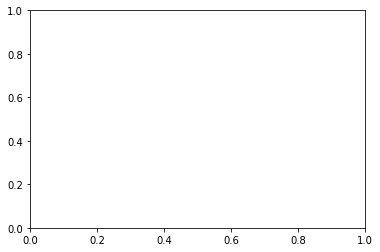

In [53]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
print(len(y_test))
reg.fit(X, y)
pred_Y = reg.predict(X_test)
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred_Y, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()



In [54]:
def homogeneous(x):
    """
    Helper function that simply adds a column of ones to the given matrix/column vector.
    return: matrix with shape (x_rows, x_cols + 1)
    """
    t = np.ones((len(x), 1))
    return np.hstack((x, t))

In [55]:
def least_squares(x,y):
    """
    Computes the least squares solution to obtain the best estimate of the weights w
    that best approximate the target values y.
    x (array-like): column matrix where columns represent the features and the rows are the instances
    y (array-like): vector of target values for each example ('x[0] has expected solution y[0]')
    return: vector of size (num_features,) representing the hyperplane coefficients.
    """
    X = homogeneous(x)
    XTXinv = np.dot( inv(np.dot(X.T,X)), X.T)
    return np.dot(XTXinv, y)

In [56]:
def s_stat(actual, predicted):
    """
    Calculates the S statistic error (square root of the mean squared error).
    actual   (array-like): vector of actual values
    predicted(array-like): vector of predicted values, must have the same size of 'actual'
    return: real number indicating the S statistic
    """
    return np.sqrt(((predicted - actual)**2).mean())

S statistic: 5.0138040916235465


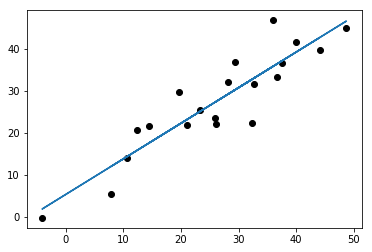

In [57]:
# area for the gaussian multivariate distribution
xx = np.array([0, 50])
yy = np.array([0, 50])
means = [xx.mean(), yy.mean()]  
stds = [xx.std()/2, yy.std()/2]

# calculating a simple covariance matrix
# correlation: 1 => points on a strainght line, 0 => points in a circle
corr = 0.8 
covs = [[stds[0]**2, stds[0]*stds[1]*corr], [stds[0]*stds[1]*corr,stds[1]**2]] 

# sampling 20 random points from the given gaussian (seed just to generate the same result)
np.random.seed(40)
m = np.random.multivariate_normal(means, covs, 20).T

# Calculating the line coefficients
w = least_squares(m[0,np.newaxis].T, m[1])

# plotting the scattered points and the linear estimate
ys = w[0]*m[0] + w[1]
plt.scatter(m[0], m[1], c='black')
plt.plot(m[0], ys)

#S statistic
print("S statistic:", s_stat(m[1], ys))

In [58]:
# Modyfing the sets into homogeneous coordinates in order to correctly compute the dot product.
X1_train = homogeneous(X)
X1_test = homogeneous(X_test)

# Calculating the coefficients w (C + d) and predicting the values on both sets.
w = least_squares(X,y)
y_train_pred = np.dot(X1_train,w)
y_test_pred = np.dot(X1_test,w)

In [59]:
# Creating a new regressor, fitting it on the same data
scikit_model = LinearRegression()
scikit_model = scikit_model.fit(X,y)

# Generating the predictions for the same sets
y_train_scikit = scikit_model.predict(X)
y_test_scikit = scikit_model.predict(X_test)

#Printing the results, expecting a match
print("\nLeast squares solution:")
print("--------------------------")
print("S statistic (train): \t",s_stat(y, y_train_pred))
print("S statistic (test) : \t",s_stat(y_test, y_test_pred))
print("\nScikit LinearRegression:")
print("--------------------------")
print("S statistic (train): \t",s_stat(y, y_train_scikit))
print("S statistic (test) : \t",s_stat(y_test, y_test_scikit))


Least squares solution:
--------------------------
S statistic (train): 	 42242.61291734747
S statistic (test) : 	 27173.234541725964

Scikit LinearRegression:
--------------------------
S statistic (train): 	 4.722840838326382
S statistic (test) : 	 6.177729246514691


In [49]:
def ridge_regression(x,y,l=0.01):
    """
    Computes the ridge regression solution to generate the best estimate of the vector w
    containing the coefficients on the hyperplane.
    x (array-like): column matrix where columns represent the features and the rows are the instances
    y (array-like): vector of target values for each example ('x[0] has expected solution y[0]')
    return: vector of size (num_features,) representing the hyperplane coefficients.
    """
    X = homogeneous(x)
    XTX = np.dot(X.T, X)
    lambdaI = np.eye(XTX.shape[0]) * l
    inverse = inv(XTX - lambdaI)
    return inverse.dot(X.T).dot(y)

In [50]:
# Modyfing the sets into homogeneous coordinates in order to correctly compute the dot product.
X1_train = homogeneous(X)
X1_test = homogeneous(X_test)

# Calculating the coefficients w (C + d) with ridge regression and predicting the values on both sets.
w = ridge_regression(X,y)
y_train_pred = np.dot(X1_train,w)
y_test_pred = np.dot(X1_test,w)

print("\nRidge Regression solution:")
print("--------------------------")
print("S statistic (train): \t",s_stat(y, y_train_pred))
print("S statistic (test) : \t",s_stat(y_test, y_test_pred))


Ridge Regression solution:
--------------------------
S statistic (train): 	 4.7228635756189465
S statistic (test) : 	 6.18739767490431


In [51]:
def lasso_regression(w, X, y, l):
    """
    Lasso regression function used by a minimizing procedure (not one shot like the previous methods).
    w (array-like) : shape (n_features), the only variable, weights/coefficients that need to be minimized
    X (array-like) : shape(n_inst, n_features) extra parameter corresponding to the training data
    y (array-like) : shape(n_instances) extra param containing the actual values
    l (float)      : lambda value (0.01)
    """
    yXw = (y - X.dot(w))
    return yXw.T.dot(yXw) + l*norm(w,1)

In [52]:
init_guess = np.zeros((X1_train.shape[1]))
w = fmin_bfgs(lasso_regression, init_guess, args=(X1_train, y, 0.01))
y_train_pred = np.dot(X1_train,w)
y_test_pred = np.dot(X1_test,w)

print("\nLasso Regression solution:")
print("--------------------------")
print("S statistic (train): \t",s_stat(y, y_train_pred))
print("S statistic (test) : \t",s_stat(y_test, y_test_pred))

         Current function value: 8922.627021
         Iterations: 19
         Function evaluations: 811
         Gradient evaluations: 47

Lasso Regression solution:
--------------------------
S statistic (train): 	 4.722840863830315
S statistic (test) : 	 6.177489042249539
